In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_merged = pd.read_csv("../Data/Clean/final_project_data_merge_clean.csv", low_memory=False)
df_merged

,Nombre Local,ID Factura,Fecha Fin Transaccion,Codigo Interno del Producto,Codigo producto,Descripcion del Producto,Categoria 1,Categoria 2,Subtotal,Descuentos,Impuestos,Total,Unidades Vendidas,Precio,Week_Number,Month,Year
0,Restaurant 2,20240801_102403_V11G,2024-08-01 12:42:00,3232,casacasco02-845854d65a4841e5_3232_ab36d2473dbd...,Dorado al Coco,Comida,Principales,26.00,0.0,1.82,27.82,1,26.00,31,8,2024
1,Restaurant 2,20240801_102403_V11G,2024-08-01 12:42:00,780,casacasco02-845854d65a4841e5_780_e6aed2a7b2f26f98,Coconut Passion,Bebidas Alcoholicas,Cocteles de la Casa,13.50,0.0,0.95,14.45,1,13.50,31,8,2024
2,Restaurant 2,20240801_102403_V11G,2024-08-01 12:42:00,694,casacasco02-845854d65a4841e5_694_d99dd7663179a996,Lavazza Cafe,Bebidas No Alcoholicas,Cafe,5.00,0.0,0.35,5.35,1,5.00,31,8,2024
3,Restaurant 1,20240801_283560_V10G,2024-08-01 13:00:00,510,casacasco01-5d78e012c5714e63_510_3557ca1abc96af50,Hamburguesa Marula,Comida,Principales,19.00,0.0,1.33,20.33,1,19.00,31,8,2024
4,Restaurant 1,20240801_283560_V10G,2024-08-01 13:00:00,1738,casacasco01-5d78e012c5714e63_1738_e1915d2f782f...,Pizza de Prosciutto,Comida,Principales,18.00,0.0,1.26,19.26,1,18.00,31,8,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89669,Restaurant 2,20240930_83902_VAAG,2024-09-30 22:14:00,182,elfaro02-58c61a7f6a474ee2_182_1c8993868b83fef4,Mini Hamburguesas,Comida,Entrantes,10.00,0.0,0.70,10.70,1,10.00,40,9,2024
89670,Restaurant 2,20240930_83902_VAAG,2024-09-30 22:14:00,10120005,elfaro02-58c61a7f6a474ee2_10120005_8ee2d04f187...,SandBanks,Bebidas Alcoholicas,Mojitos,9.00,0.0,0.63,9.63,1,9.00,40,9,2024
89671,Restaurant 2,20240930_83900_VAAG,2024-09-30 22:35:00,674,elfaro02-58c61a7f6a474ee2_674_5f49cbf22ed9b09d,Red Sea (Frutos del Bosque),Bebidas No Alcoholicas,Cocteles Sin Alcohol,6.50,0.0,0.46,6.96,1,6.50,40,9,2024
89672,Restaurant 2,20240930_83903_VAAG,2024-09-30 23:05:00,1026,elfaro02-58c61a7f6a474ee2_1026_9ec20b79a5b3f170,Mar de Leva,Bebidas Alcoholicas,Cocteles Autor,13.00,0.0,0.91,13.91,1,13.00,40,9,2024


# Total sales per restaurant

In [3]:
# Agrupar por restaurante y calcular las ventas totales
ventas_totales_restaurantes = df_merged.groupby('Nombre Local')['Total'].sum().reset_index()

# Renombrar columnas para mayor claridad
ventas_totales_restaurantes.columns = ['Restaurante', 'Ventas Totales']

# Mostrar las ventas totales de cada restaurante
print(ventas_totales_restaurantes)

    Restaurante  Ventas Totales
0  Restaurant 1      1295437.33
1  Restaurant 2       376343.38


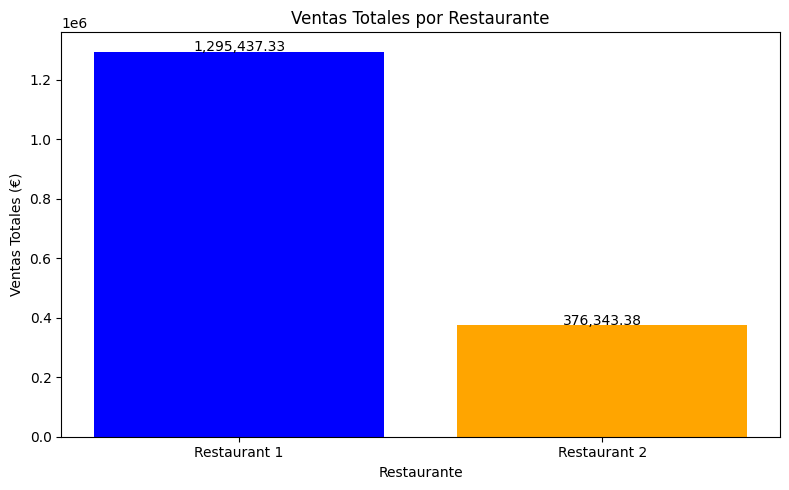

In [5]:
# Agrupar por restaurante y calcular las ventas totales
ventas_totales_restaurantes = df_merged.groupby('Nombre Local')['Total'].sum().reset_index()

# Renombrar columnas para mayor claridad
ventas_totales_restaurantes.columns = ['Restaurante', 'Ventas Totales']

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(ventas_totales_restaurantes['Restaurante'], ventas_totales_restaurantes['Ventas Totales'], color=['blue', 'orange'])

# Personalizar el gráfico
plt.title('Ventas Totales por Restaurante')
plt.xlabel('Restaurante')
plt.ylabel('Ventas Totales (€)')
for i, value in enumerate(ventas_totales_restaurantes['Ventas Totales']):
    plt.text(i, value + 500, f"{value:,.2f}", ha='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Total sales per category

In [6]:
# Agrupar por restaurante y categoría 1 para calcular las ventas totales
ventas_por_categoria = df_merged.groupby(['Nombre Local', 'Categoria 1'])['Total'].sum().reset_index()

# Identificar la categoría con mayores ventas para cada restaurante
categoria_mas_vendida = ventas_por_categoria.loc[ventas_por_categoria.groupby('Nombre Local')['Total'].idxmax()]

# Renombrar columnas para mayor claridad
categoria_mas_vendida.columns = ['Restaurante', 'Categoría Más Vendida', 'Ventas Totales']

# Mostrar los resultados
from IPython.display import display
display(categoria_mas_vendida)

,Restaurante,Categoría Más Vendida,Ventas Totales
0,Restaurant 1,Bebidas Alcoholicas,835743.75
4,Restaurant 2,Bebidas Alcoholicas,188115.10


In [7]:
# Agrupar por restaurante y categoría 1 para calcular las ventas totales
ventas_por_categoria = df_merged.groupby(['Nombre Local', 'Categoria 1'])['Total'].sum().reset_index()

# Renombrar las columnas para mayor claridad
ventas_por_categoria.columns = ['Restaurante', 'Categoría', 'Ventas Totales']

# Mostrar el desglose de ventas por categoría para cada restaurante
print(ventas_por_categoria)

    Restaurante               Categoría  Ventas Totales
0  Restaurant 1     Bebidas Alcoholicas       835743.75
1  Restaurant 1  Bebidas No Alcoholicas        80579.29
2  Restaurant 1                  Comida       378995.52
3  Restaurant 1                  Extras          118.77
4  Restaurant 2     Bebidas Alcoholicas       188115.10
5  Restaurant 2  Bebidas No Alcoholicas        29589.04
6  Restaurant 2                  Comida       158630.01
7  Restaurant 2                 Propina            9.23


In [8]:
# Mostrar el DataFrame de manera más clara
from IPython.display import display
display(ventas_por_categoria)

,Restaurante,Categoría,Ventas Totales
0,Restaurant 1,Bebidas Alcoholicas,835743.75
1,Restaurant 1,Bebidas No Alcoholicas,80579.29
2,Restaurant 1,Comida,378995.52
3,Restaurant 1,Extras,118.77
4,Restaurant 2,Bebidas Alcoholicas,188115.10
5,Restaurant 2,Bebidas No Alcoholicas,29589.04
6,Restaurant 2,Comida,158630.01
7,Restaurant 2,Propina,9.23


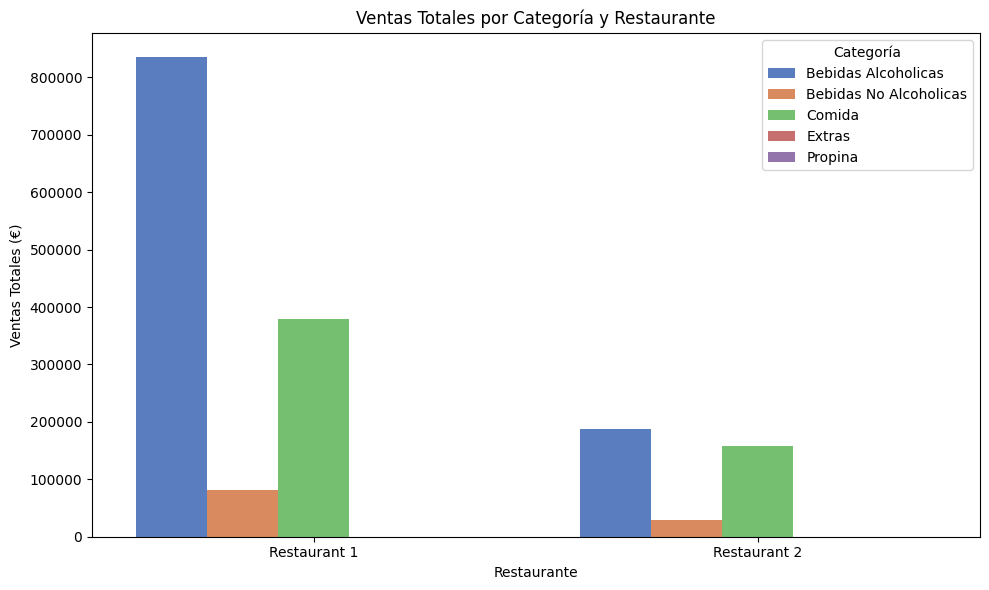

In [9]:
# Crear un gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(
    data=ventas_por_categoria,
    x='Restaurante',
    y='Ventas Totales',
    hue='Categoría',
    palette='muted'
)

# Personalizar el gráfico
plt.title('Ventas Totales por Categoría y Restaurante')
plt.xlabel('Restaurante')
plt.ylabel('Ventas Totales (€)')
plt.legend(title='Categoría', loc='upper right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Analysis: Total Sales per Category

Restaurant 1:
- Top category: Alcoholic beverages (€835,743.75) dominate sales.
Second category: Food (€378,995.52) contributes significantly but trails beverages.
- Opportunities: Boost non-alcoholic beverage sales and re-evaluate the minimal impact of extras.

Restaurant 2:
- Top category: Alcoholic beverages (€188,115.10) lead but are closely followed by food (€158,630.01), showing a balanced distribution.
- Opportunities: Increase alcoholic beverage sales and optimize non-alcoholic drinks and extras.

## Recommendations
Restaurant 1:
- Focus on premium alcoholic drinks and pairings.
- Create promotions for food and non-alcoholic beverages.

Restaurant 2:
- Promote signature cocktails and bundle deals with meals.
- Enhance the appeal of extras and non-alcoholic drinks.

Both Restaurants:
- Train staff for upselling.
- Use customer feedback to refine offerings and drive growth.

# Best-selling individual products in each restaurant

In [10]:
# Agrupar por restaurante y producto para calcular las unidades vendidas
productos_mas_vendidos = df_merged.groupby(['Nombre Local', 'Descripcion del Producto'])['Unidades Vendidas'].sum().reset_index()

# Identificar el producto más vendido en cada restaurante
productos_mas_vendidos_restaurantes = productos_mas_vendidos.loc[productos_mas_vendidos.groupby('Nombre Local')['Unidades Vendidas'].idxmax()]

# Renombrar columnas para mayor claridad
productos_mas_vendidos_restaurantes.columns = ['Restaurante', 'Producto Más Vendido', 'Unidades Vendidas']

# Identificar el producto más vendido en general
producto_mas_vendido_general = productos_mas_vendidos.loc[productos_mas_vendidos['Unidades Vendidas'].idxmax()]

# Mostrar la tabla de productos más vendidos por restaurante
print("Productos más vendidos por restaurante:")
print(productos_mas_vendidos_restaurantes)

# Mostrar el producto más vendido en general
print("\nProducto más vendido en general:")
print(producto_mas_vendido_general)

Productos más vendidos por restaurante:
      Restaurante     Producto Más Vendido  Unidades Vendidas
43   Restaurant 1  Balboa Roja lata 330 ml              10677
604  Restaurant 2     Corona Extra  355 ml               2783

Producto más vendido en general:
Nombre Local                           Restaurant 1
Descripcion del Producto    Balboa Roja lata 330 ml
Unidades Vendidas                             10677
Name: 43, dtype: object


In [11]:
from IPython.display import display

# Mostrar la tabla de productos más vendidos por restaurante
print("Productos más vendidos por restaurante:")
display(productos_mas_vendidos_restaurantes)

# Mostrar el producto más vendido en general
print("\nProducto más vendido en general:")
display(producto_mas_vendido_general)

Productos más vendidos por restaurante:


,Restaurante,Producto Más Vendido,Unidades Vendidas
43,Restaurant 1,Balboa Roja lata 330 ml,10677
604,Restaurant 2,Corona Extra 355 ml,2783



Producto más vendido en general:


Nombre Local                           Restaurant 1
Descripcion del Producto    Balboa Roja lata 330 ml
Unidades Vendidas                             10677
Name: 43, dtype: object

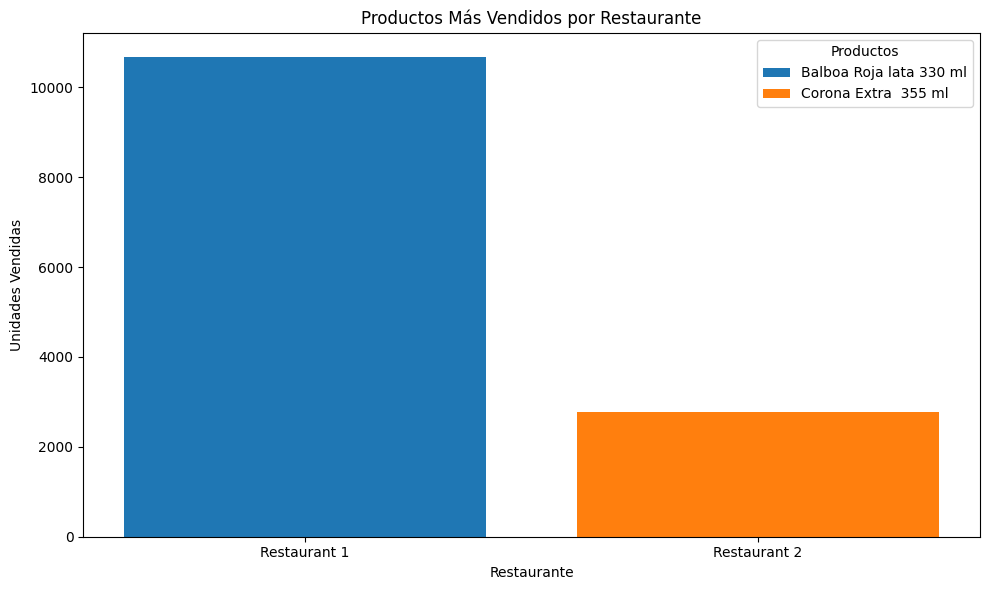

In [12]:
# Crear un gráfico de barras para los productos más vendidos por restaurante
plt.figure(figsize=(10, 6))

# Iterar por los restaurantes y graficar sus productos más vendidos
for i, row in productos_mas_vendidos_restaurantes.iterrows():
    plt.bar(row['Restaurante'], row['Unidades Vendidas'], label=row['Producto Más Vendido'])

# Personalizar el gráfico
plt.title('Productos Más Vendidos por Restaurante')
plt.xlabel('Restaurante')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Productos')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Conclusion
- Restaurant 1: The Balboa Roja beer is the best-selling product.
- Restaurant 2: The Corona Extra beer is the best-selling product.

# Average ticket by restaurant

In [14]:
# Calcular las ventas totales y el número de facturas por restaurante
ticket_promedio = df_merged.groupby('Nombre Local').agg({
    'Total': 'sum',
    'ID Factura': 'nunique'  # Contar el número de facturas únicas
}).reset_index()

# Calcular el ticket promedio
ticket_promedio['Ticket Promedio'] = ticket_promedio['Total'] / ticket_promedio['ID Factura']

# Renombrar columnas para claridad
ticket_promedio.columns = ['Restaurante', 'Ventas Totales', 'Número de Facturas', 'Ticket Promedio']

# Mostrar los resultados
print(ticket_promedio)

    Restaurante  Ventas Totales  Número de Facturas  Ticket Promedio
0  Restaurant 1      1295437.33               20861        62.098525
1  Restaurant 2       376343.38                6393        58.868040


In [15]:
display(ticket_promedio)

,Restaurante,Ventas Totales,Número de Facturas,Ticket Promedio
0,Restaurant 1,1295437.33,20861,62.098525
1,Restaurant 2,376343.38,6393,58.868040


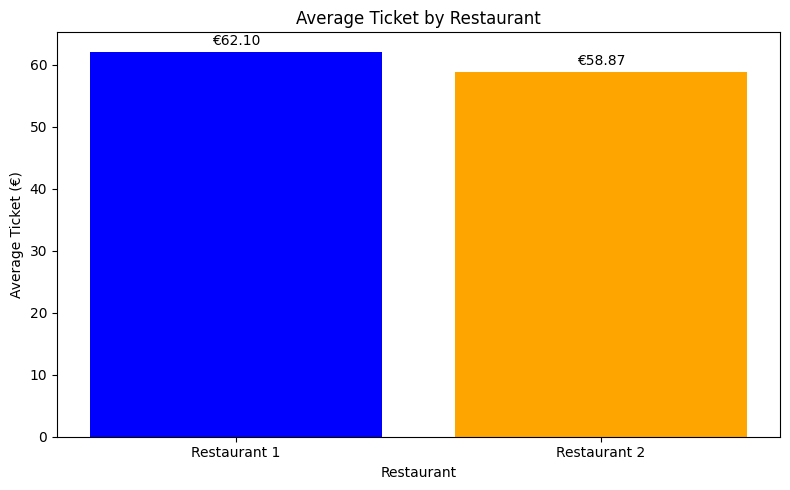

In [16]:
# Crear un gráfico de barras para visualizar el ticket promedio por restaurante
plt.figure(figsize=(8, 5))
plt.bar(ticket_promedio['Restaurante'], ticket_promedio['Ticket Promedio'], color=['blue', 'orange'])

# Añadir etiquetas con los valores del ticket promedio
for i, value in enumerate(ticket_promedio['Ticket Promedio']):
    plt.text(i, value + 1, f"€{value:.2f}", ha='center', fontsize=10)

# Personalizar el gráfico
plt.title('Average Ticket by Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Average Ticket (€)')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Analysis

Restaurant 1: Higher average ticket (€62.10), indicating customers spend more per visit. Likely due to effective upselling or premium product choices.

Restaurant 2: Lower average ticket (€58.87), suggesting opportunities to increase per-visit spending.

Recommendations:

Restaurant 1:
- Maintain high spending with premium combos and excellent service.
- Focus on upselling high-margin items.

Restaurant 2:
- Boost ticket size with meal packages and staff upselling training.
- Introduce higher-priced options to appeal to premium customers.

Both Restaurants:
- Implement loyalty programs to encourage repeat visits.
- Analyze top-selling products to optimize promotions and cross-selling strategies.

# Impact of discounts per units sold by restaurant

In [17]:
# Crear una columna para identificar si hay descuento aplicado
df_merged['Descuento Aplicado'] = df_merged['Descuentos'] > 0

# Agrupar por restaurante y si hay descuento para analizar el impacto
impacto_descuentos = df_merged.groupby(['Nombre Local', 'Descuento Aplicado']).agg({
    'Unidades Vendidas': 'sum',
    'Total': 'sum'
}).reset_index()

# Renombrar columnas para claridad
impacto_descuentos.columns = ['Restaurante', 'Descuento Aplicado', 'Unidades Vendidas', 'Ventas Totales']

# Mostrar los resultados
print("Impacto de los Descuentos en Ventas:")
print(impacto_descuentos)

Impacto de los Descuentos en Ventas:
    Restaurante  Descuento Aplicado  Unidades Vendidas  Ventas Totales
0  Restaurant 1               False             105796      1279996.19
1  Restaurant 1                True               1733        15441.14
2  Restaurant 2               False              34687       368521.00
3  Restaurant 2                True                827         7822.38


In [18]:
from IPython.display import display
display(impacto_descuentos)

,Restaurante,Descuento Aplicado,Unidades Vendidas,Ventas Totales
0,Restaurant 1,False,105796,1279996.19
1,Restaurant 1,True,1733,15441.14
2,Restaurant 2,False,34687,368521.00
3,Restaurant 2,True,827,7822.38


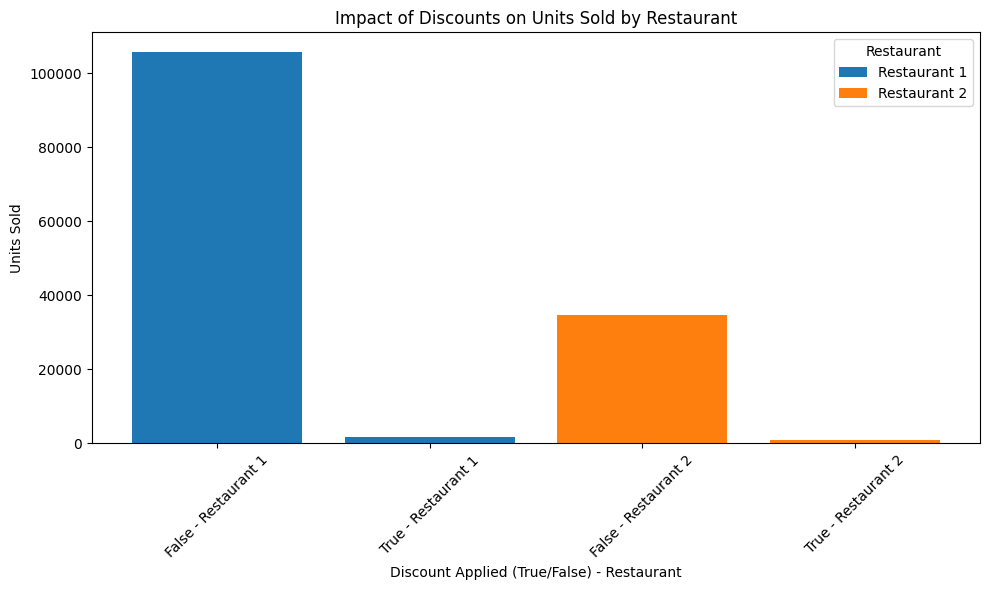

In [19]:
# Crear un gráfico de barras agrupadas para visualizar el impacto de los descuentos
plt.figure(figsize=(10, 6))
for key, group in impacto_descuentos.groupby('Restaurante'):
    plt.bar(
        group['Descuento Aplicado'].astype(str) + f" - {key}",
        group['Unidades Vendidas'],
        label=key
    )

# Añadir etiquetas y personalizar el gráfico
plt.title('Impact of Discounts on Units Sold by Restaurant')
plt.xlabel('Discount Applied (True/False) - Restaurant')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Restaurant')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Analysis

Restaurant 1:
- Most sales (105,796 units, €1,279,996.19) occur without discounts.
- Discounts lead to only 1,733 units sold (€15,441.14), suggesting minimal reliance on discounts to drive sales.

Restaurant 2:
- Similarly, the majority of sales (34,687 units, €368,521.00) happen without discounts.
- Discounts result in 827 units sold (€7,822.38), showing a limited impact on overall sales.

## Conclusion
Both restaurants generate the majority of their revenue and units sold without relying on discounts. Discounts have a minimal effect on increasing sales volume, indicating they are not a major driver of customer purchasing behavior in these establishments.

# The 10 best-selling dishes in each restaurant

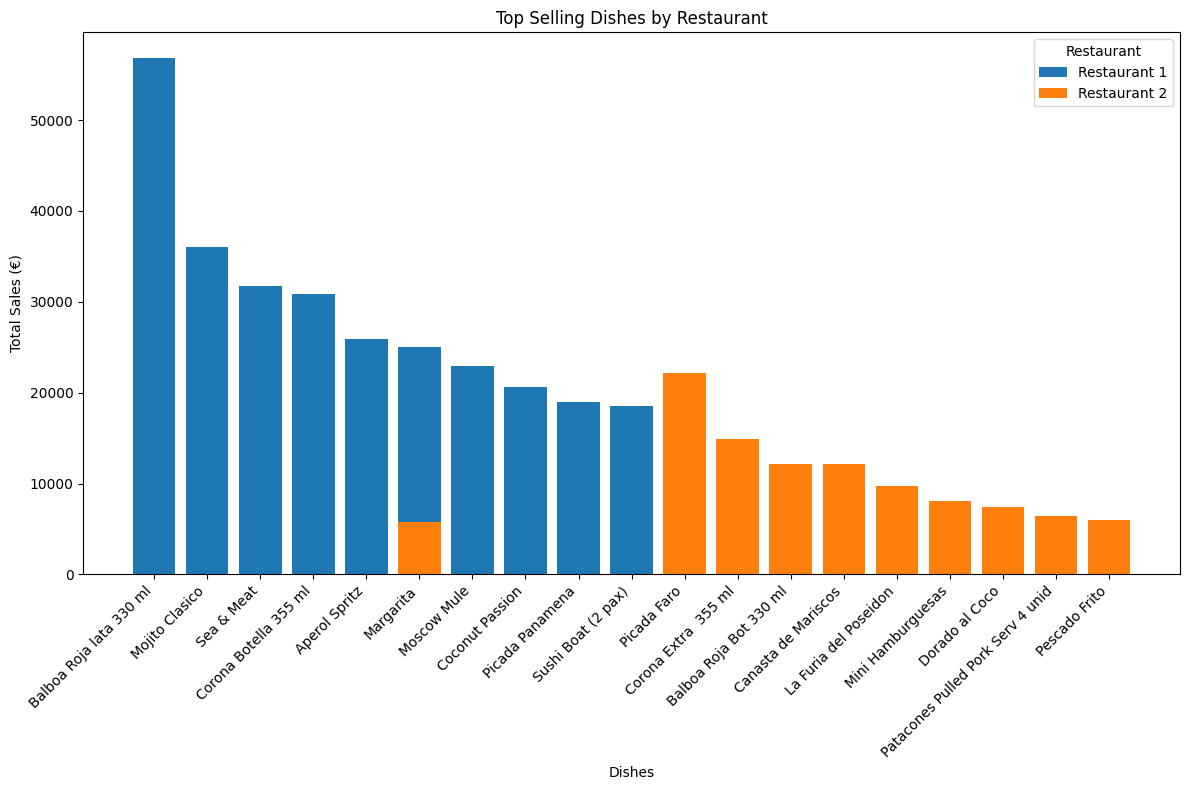

In [20]:
# Calcular ventas totales por plato y restaurante
ventas_por_plato = df_merged.groupby(['Nombre Local', 'Descripcion del Producto'])['Total'].sum().reset_index()
ventas_por_plato.columns = ['Restaurante', 'Plato', 'Ventas Totales']

# Ordenar los datos por restaurante y ventas totales
ventas_por_plato_sorted = ventas_por_plato.sort_values(by=['Restaurante', 'Ventas Totales'], ascending=[True, False])

# Filtrar los platos más vendidos (opcional: top 10 por restaurante)
top_ventas_por_plato = ventas_por_plato_sorted.groupby('Restaurante').head(10)

# Crear el gráfico con platos en horizontal y ventas totales en el eje vertical
plt.figure(figsize=(12, 8))
for restaurante, group in top_ventas_por_plato.groupby('Restaurante'):
    plt.bar(group['Plato'], group['Ventas Totales'], label=restaurante)

# Personalización del gráfico
plt.title('Top Selling Dishes by Restaurant')
plt.ylabel('Total Sales (€)')
plt.xlabel('Dishes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Restaurant')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Analysis & Recommendations

Restaurant 1:
- The top-selling dishes are predominantly beverages, led by Balboa Roja lata 330 ml and Mojito Clasico.
- Food items like Sea & Meat and Sushi Boat also perform well but are less significant compared to beverages.

Recommendations:
- Focus on beverages: Enhance beverage offerings, introduce new cocktails, and consider bundle deals with food to boost overall sales.
- Promote food items: Highlight high-performing dishes like Sea & Meat to balance sales between food and beverages.

Restaurant 2:
- The best-sellers include food items like Picada Faro and beverages such as Corona Extra 355 ml.
- Sales are more evenly distributed between food and beverages compared to Restaurant 1.

Recommendations:
- Capitalize on balanced offerings: Promote combo deals pairing popular food and drinks.
- Expand high-performing categories: Introduce variations of best-sellers like Picada Faro to attract repeat customers.

General:
- Both restaurants should use data-driven marketing, such as promoting their top-selling items during peak hours or events, and explore cross-selling opportunities to maximize revenue.

# 5 Products with the highest income per unit for each restaurant

Number of units sold with the income generated by those sales. You could identify high-margin products (low units but high revenue) versus low-margin products.

In [31]:
# Cargar el dataset (ajusta la ruta según corresponda)
df_merged = pd.read_csv("../Data/Clean/final_project_data_merge_clean.csv", low_memory=False)

# Calcular el número total de unidades vendidas y el ingreso generado por cada producto
productos_margen = df_merged.groupby(['Nombre Local', 'Descripcion del Producto']).agg({
    'Unidades Vendidas': 'sum',
    'Total': 'sum'
}).reset_index()

# Renombrar columnas para mayor claridad
productos_margen.columns = ['Restaurante', 'Producto', 'Unidades Vendidas', 'Ventas Totales']

# Calcular el ratio de ingreso por unidad
productos_margen['Ingreso por Unidad'] = productos_margen['Ventas Totales'] / productos_margen['Unidades Vendidas']

# Ordenar por ingreso por unidad y mostrar los 10 productos con mayor margen
productos_margen_sorted = productos_margen.sort_values(by='Ingreso por Unidad', ascending=False)

# Mostrar los resultados
print("Top 10 productos con mayor ingreso por unidad:")
display(productos_margen_sorted.head(10))

Top 10 productos con mayor ingreso por unidad:


,Restaurante,Producto,Unidades Vendidas,Ventas Totales,Ingreso por Unidad
157,Restaurant 1,Dom Perignon Rose Servicio,1,856.0,856.000
290,Restaurant 1,Macallan Harmony Collection Servicio,1,609.9,609.900
159,Restaurant 1,Don Julio 1942 Servicio 750ML,5,2140.0,428.000
624,Restaurant 2,Don Julio 1942 Servicio,1,428.0,428.000
92,Restaurant 1,Casamigos Anejo Servicio 750 ml,1,235.4,235.400
287,Restaurant 1,Macal Oak 12 Servicio,14,2996.0,214.000
225,Restaurant 1,Glenmorangie Qta Ruban Servicio 700ML,1,203.3,203.300
548,Restaurant 2,Buchanans 18 Servicio,4,802.5,200.625
625,Restaurant 2,Don Julio Anejo Servicio,1,192.6,192.600
161,Restaurant 1,Don Julio Anejo Servicio,2,385.2,192.600


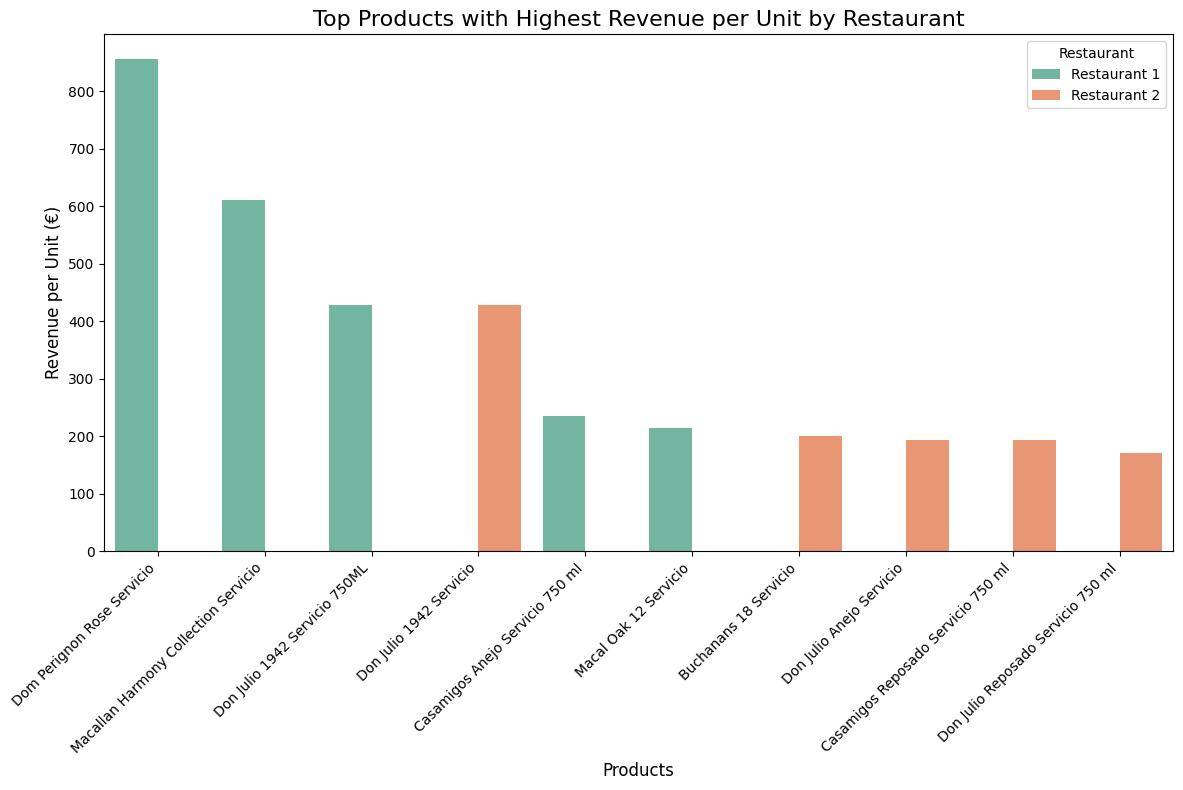

In [35]:
# Calcular el número total de unidades vendidas y el ingreso generado por cada producto
productos_margen = df_merged.groupby(['Nombre Local', 'Descripcion del Producto']).agg({
    'Unidades Vendidas': 'sum',
    'Total': 'sum'
}).reset_index()

# Renombrar columnas para mayor claridad
productos_margen.columns = ['Restaurante', 'Producto', 'Unidades Vendidas', 'Ventas Totales']

# Calcular el ratio de ingreso por unidad
productos_margen['Ingreso por Unidad'] = productos_margen['Ventas Totales'] / productos_margen['Unidades Vendidas']

# Ordenar por ingreso por unidad
productos_margen_sorted = productos_margen.sort_values(by='Ingreso por Unidad', ascending=False)

# Filtrar los 5 productos principales por restaurante
top_productos_por_restaurante = productos_margen_sorted.groupby('Restaurante').head(5)

# Crear un gráfico de barras con ejes invertidos
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_productos_por_restaurante,
    x='Producto',
    y='Ingreso por Unidad',
    hue='Restaurante',
    dodge=True,
    palette='Set2'
)

# Personalizar etiquetas y diseño
plt.title('Top Products with Highest Revenue per Unit by Restaurant', fontsize=16)
plt.ylabel('Revenue per Unit (€)', fontsize=12)
plt.xlabel('Products', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mayor claridad
plt.legend(title='Restaurant')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Analysis
The chart highlights the top 5 products with the highest revenue per unit for each restaurant:

Restaurant 1:
- Luxury items dominate the list, including "Dom Perignon Rose Servicio" and "Macallan Harmony Collection Servicio," which have the highest revenue per unit.
- "Don Julio 1942 Servicio 750ML" and "Macal Oak 12 Servicio" also contribute significantly, indicating strong customer demand for premium liquor options.

Restaurant 2:
- Similarly, premium liquor items, such as "Don Julio 1942 Servicio" and "Casamigos Anejo Servicio 750 ml," lead the revenue per unit.
- Products like "Buchanans 18 Servicio" suggest a niche focus on high-end spirits.

Recommendations:

Focus on Premium Offerings:
- Both restaurants should prioritize marketing their high-revenue luxury items, as these products yield the greatest profit margins.

Upselling Opportunities:
- Train staff to upsell premium options like Dom Perignon and Don Julio, especially during peak hours or special events.

Menu Visibility:
- Highlight these items prominently on menus and digital platforms to attract high-spending customers.

Targeted Promotions:
- Consider offering bundled packages or exclusive deals for these premium products to drive sales further.

Customer Feedback:
- Collect insights from high-spending customers to identify potential new premium offerings or to refine current products.

This strategy can help maximize revenue and enhance the luxury perception of both restaurants.

# Comparison of categories by restaurant

Full breakdown of all categories to compare how each restaurant balances its offering

<Figure size 1200x800 with 0 Axes>

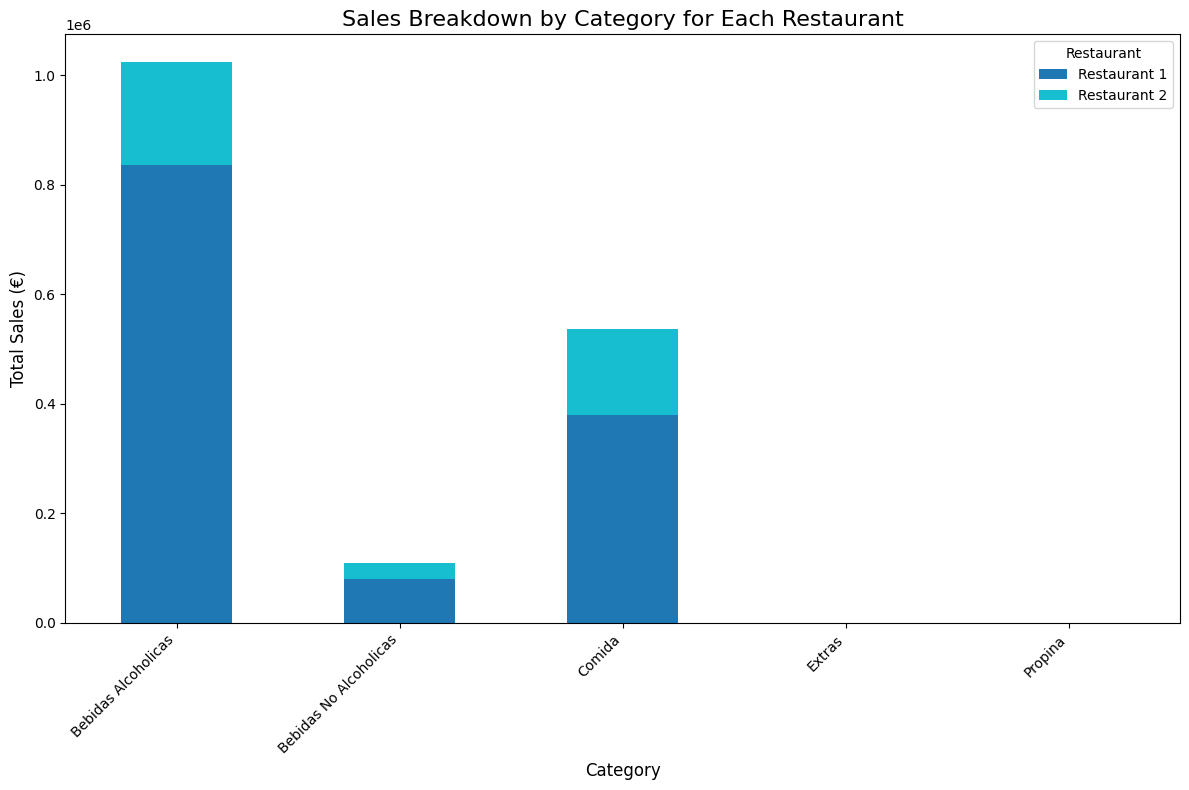

In [24]:
# Load the dataset (adjust the file path as necessary)
df_merged = pd.read_csv("../Data/Clean/final_project_data_merge_clean.csv", low_memory=False)

# Aggregate total sales and units sold by restaurant and category
categoria_desglose = df_merged.groupby(['Nombre Local', 'Categoria 1']).agg({
    'Unidades Vendidas': 'sum',
    'Total': 'sum'
}).reset_index()

# Rename columns for clarity
categoria_desglose.columns = ['Restaurante', 'Categoría', 'Unidades Vendidas', 'Ventas Totales']

# Create a stacked bar chart to compare all categories between restaurants
plt.figure(figsize=(12, 8))
categoria_pivot = categoria_desglose.pivot(index='Categoría', columns='Restaurante', values='Ventas Totales')
categoria_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab10')

# Customize labels and layout
plt.title('Sales Breakdown by Category for Each Restaurant', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales (€)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Restaurant')
plt.tight_layout()

# Display the chart
plt.show()

## Analysis

Alcoholic Beverages Dominance:
- Restaurant 1 shows a substantial dependency on alcoholic beverages, contributing significantly to its total sales. This category outperforms all others combined.
- Restaurant 2 also generates a notable portion of its revenue from alcoholic beverages, but to a lesser extent compared to Restaurant 1.

Food Contribution:
- Food sales are the second-largest contributor to revenue in both restaurants.
- Restaurant 2 appears to have a more balanced revenue split between food and alcoholic beverages compared to Restaurant 1.

Non-Alcoholic Beverages and Miscellaneous Categories:
- Non-alcoholic beverages have a minor impact on total sales for both restaurants.
- Extras and tips represent a negligible portion of the revenue, indicating a potential area for improvement or additional focus.

## Recommendations

For Restaurant 1:
1. Diversify the Offerings:
- Consider strategies to increase food sales to reduce dependency on alcoholic beverages. Promoting combo deals or special dishes can help achieve this balance.
2. Enhance Non-Alcoholic Options:
- Introduce high-margin non-alcoholic options, such as specialty coffees, smoothies, or mocktails, to appeal to a broader audience.
3. Upsell Extras:
- Leverage upselling techniques to encourage customers to purchase extras (e.g., desserts or sides) and increase average ticket value.

For Restaurant 2:
1. Capitalize on Balance:
- Continue leveraging the balanced revenue streams between food and beverages. Highlight food items that perform well and pair them with beverage promotions.
2. Explore Alcoholic Beverage Potential:
- Expand the variety or premium options for alcoholic beverages to close the gap in this category compared to Restaurant 1.
3. Drive Engagement with Less Profitable Categories:
- Develop creative campaigns to increase sales of less popular categories like extras or non-alcoholic beverages, possibly targeting specific demographics.

## Conclusion
- Both restaurants should monitor trends and customer preferences to optimize their menu and offerings, ensuring a balance between revenue stability and growth opportunities.

# Top 10 most profitable products by restaurant

- Analizar el margen de ganancia promedio por producto o categoría.
- Insight: "¿Qué productos son los más rentables para cada restaurante?

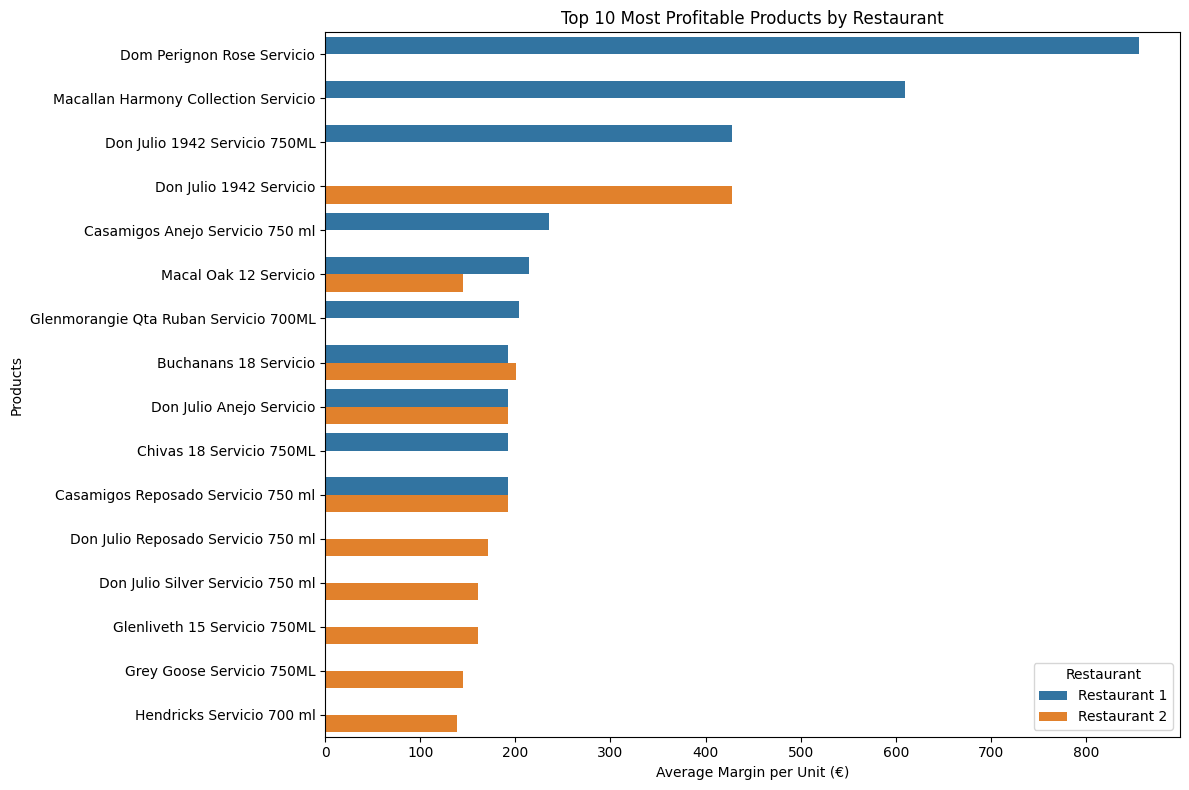

In [25]:
# Cargar el dataset
df_merged = pd.read_csv("../Data/Clean/final_project_data_merge_clean.csv", low_memory=False)

# Calcular el margen de ganancia promedio por producto
productos_rentables = df_merged.groupby(['Nombre Local', 'Descripcion del Producto']).agg({
    'Unidades Vendidas': 'sum',
    'Total': 'sum'
}).reset_index()

# Calcular margen promedio por producto
productos_rentables['Margen Promedio por Unidad'] = productos_rentables['Total'] / productos_rentables['Unidades Vendidas']

# Ordenar los productos por margen promedio
productos_rentables_sorted = productos_rentables.sort_values(by='Margen Promedio por Unidad', ascending=False)

# Mostrar los 10 productos más rentables por restaurante
top_productos_rentables = productos_rentables_sorted.groupby('Nombre Local').head(10)

# Graficar los productos más rentables por restaurante
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_productos_rentables,
    x='Margen Promedio por Unidad',
    y='Descripcion del Producto',
    hue='Nombre Local',
    dodge=True
)
plt.title("Top 10 Most Profitable Products by Restaurant")
plt.xlabel("Average Margin per Unit (€)")
plt.ylabel("Products")
plt.legend(title="Restaurant")
plt.tight_layout()
plt.show()

## Analysis

This bar chart illustrates the top 10 most profitable products for each restaurant, ranked by their average margin per unit. 
- Restaurant 1 dominates with high-margin luxury items such as "Dom Perignon Rose Servicio" and "Macallan Harmony Collection Servicio," suggesting its focus on premium beverages.
- Restaurant 2 also features high-margin drinks like "Don Julio 1942 Servicio," although its profitability per unit is comparatively lower.

The most profitable products for each restaurant are:

Restaurant 1:
1. Dom Perignon Rose Servicio - Highest average margin per unit.
2. Macallan Harmony Collection Servicio - Another premium product with a high margin.
3. Don Julio 1942 Servicio 750ML - Popular luxury tequila with significant profitability.
4. Glenmorangie Qta Ruban Servicio 700ML - A profitable whisky option.
5. Chivas 18 Servicio 750ML - A strong contributor to profitability in the whisky category.

Restaurant 2:
1. Don Julio 1942 Servicio - Most profitable product for this restaurant.
2. Macal Oak 12 Servicio - A key whisky offering with a high margin.
3. Buchanans 18 Servicio - Another profitable whisky selection.
4. Casamigos Reposado Servicio 750 ml - A high-margin tequila option.
5. Don Julio Reposado Servicio 750 ml - Strong tequila sales with significant profitability.

These products are high-margin luxury items, primarily alcoholic beverages, which align with premium pricing strategies in both restaurants.

## Recommendations

- Restaurant 1: Continue leveraging high-margin premium products but diversify offerings to include mid-range profitable items for broader customer appeal.
- Restaurant 2: Invest in marketing premium beverages like "Don Julio" to match Restaurant 1's performance and improve presentation to justify higher pricing.

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/monthly_sales_trend_bar_chart.png'

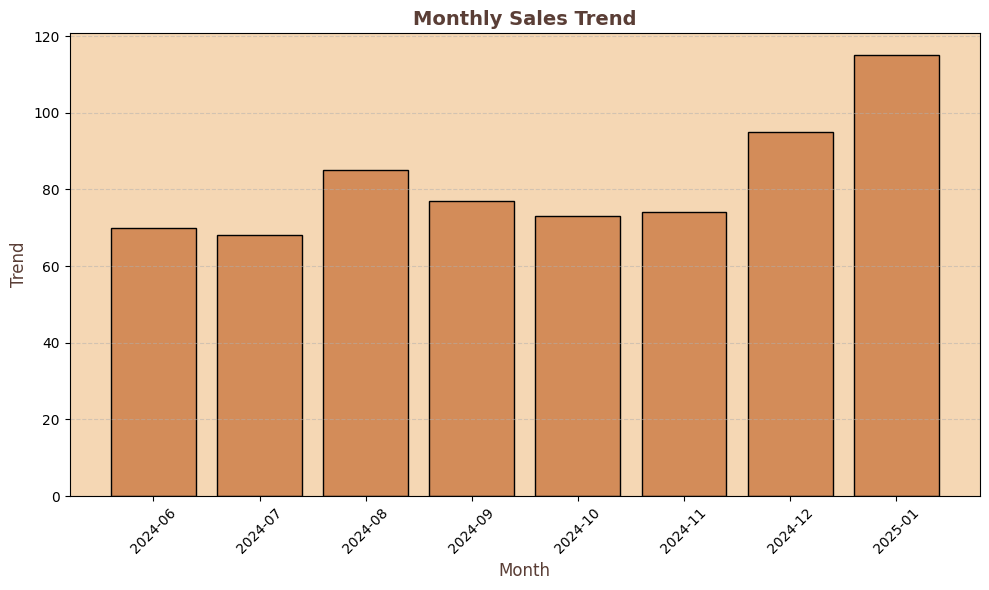

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Simulated data based on the line chart
data = {
    "Month": ["2024-06", "2024-07", "2024-08", "2024-09", "2024-10", "2024-11", "2024-12", "2025-01"],
    "Trend": [70, 68, 85, 77, 73, 74, 95, 115]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create a bar chart with the style of the presentation
plt.figure(figsize=(10, 6))
plt.bar(df["Month"], df["Trend"], color="#d38c59", edgecolor="black")

# Formatting
plt.title("Monthly Sales Trend", fontsize=14, fontweight="bold", color="#5A3E36")
plt.xlabel("Month", fontsize=12, color="#5A3E36")
plt.ylabel("Trend", fontsize=12, color="#5A3E36")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.gca().set_facecolor("#F5D7B4")
plt.tight_layout()

# Save the chart
output_path = "/mnt/data/monthly_sales_trend_bar_chart.png"
plt.savefig(output_path, dpi=300)
plt.show()

output_path